# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.13.2'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Laos', 'Holy See', 'Solomon Islands'],
 3: ['Timor-Leste'],
 4: ['Saint Kitts and Nevis', 'Saint Lucia', 'Brunei', 'Dominica'],
 5: ['Grenada', 'Tanzania', 'Fiji', 'Equatorial Guinea'],
 6: ['Antigua and Barbuda', 'Mauritius'],
 7: ['Gambia', 'Saint Vincent and the Grenadines', 'Cambodia'],
 8: ['Sao Tome and Principe', 'Northern Mariana Islands', 'Madagascar',
     'Seychelles', 'Vietnam', 'Monaco', 'Kyrgyzstan', 'Bahamas',
     'Trinidad and Tobago'],
 9: ['Bolivia', 'Zimbabwe', 'Australia', 'Bhutan', 'Oman', 'Lesotho',
     'Liechtenstein', 'Bermuda', 'Republic of the Congo', 'Suriname',
     'Uzbekistan', 'Ghana', 'Virgin Islands, U.S.', 'Kazakhstan', 'Malawi',
     'Zambia', 'Barbados', 'Djibouti', 'Swaziland'],
 10: ['Senegal', 'Saudi Arabia', 'Guatemala', 'Namibia', 'Belize', 'Maldives',
      'Ethiopia', 'Kuwait', 'India', 'Honduras', 'Kenya', 'Guyana', 'Benin',
      'Angola', 'Chile', 'Singapore', 'Mongolia', 'Burundi', 'South Africa',
      'Mozambique', 'Comoros', 'Pa

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

10

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Ukraine', 'Germany', 'Portugal', 'Belgium', 'Canada', 'Romania',
      'Norway', 'France', 'Netherlands'],
 17: ['United Kingdom']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country        Phase                                        
United Kingdom 0th    Past  18Feb2020  06Apr2020    66460344
               1st    Past  07Apr2020  23Apr2020    66460344
               2nd    Past  24Apr2020  11May2020    66460344
               3rd    Past  12May2020  11Jun2020    66460344
               4th    Past  12Jun2020  17Aug2020    66460344
               5th    Past  18Aug2020  17Sep2020    66460344
               6th    Past  18Sep2020  02Oct2020    66460344
               7th    Past  03Oct2020  11Oct2020    66460344
               8th    Past  12Oct2020  19Oct2020    66460344
               9th    Past  20Oct2020  25Oct2020    66460344
               10th   Past  26Oct2020  05Nov2020    66460344
               11th   Past  06Nov2020  11Nov2020    66460344
               12th   Past  12Nov2020  17Nov2020    66460344
               13th   Past  18Nov2020  24Nov2020    66460344
               14th   Past  25Nov2020  02Dec2020    66460344
               15th   Past  03Dec2020  10Dec2020    66460344
               16th   Past  11Dec2020  18Dec2020    66460344

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DEU,  7th phase (08Oct2020 - 19Oct2020): finished  364 trials in 0 min 10 sec

	GBR, 10th phase (26Oct2020 - 05Nov2020): finished  356 trials in 0 min 10 sec

	BEL, 14th phase (25Nov2020 - 06Dec2020): finished  356 trials in 0 min 10 sec

	DEU, 10th phase (02Nov2020 - 11Nov2020): finished  367 trials in 0 min 10 sec

	GBR, 11th phase (06Nov2020 - 11Nov2020): finished  371 trials in 0 min 10 sec

	UKR, 14th phase (03Dec2020 - 09Dec2020): finished  371 trials in 0 min 10 sec

	CAN,  3rd phase (12May2020 - 02Jun2020): finished  362 trials in 0 min 10 sec

	BEL,  7th phase (28Sep2020 - 05Oct2020): finished  370 trials in 0 min 10 sec

	GBR,  2nd phase (24Apr2020 - 11May2020): finished  365 trials in 0 min 10 sec

	GBR, 16th phase (11Dec2020 - 18Dec2020): finished  371 trials in 0 min 10 sec

	GBR,  8th phase (12Oct2020 - 19Oct2020): finished  370 trials in 0 min 10 sec

	ROU,  1st phase (02May2020 - 07Jul2020): finished  349 trials in 0 min 10 sec

	BEL,  6th phase (15Sep2020 - 27Sep2020): finished  346 trials in 0 min 10 sec

	DEU, 14th phase (02Dec2020 - 07Dec2020): finished  351 trials in 0 min 10 sec

	FRA, 12th phase (11Nov2020 - 16Nov2020): finished  348 trials in 0 min 10 sec

	UKR, 15th phase (10Dec2020 - 18Dec2020): finished  349 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  369 trials in 0 min 10 sec

	PRT,  8th phase (14Oct2020 - 21Oct2020): finished  368 trials in 0 min 10 sec

	ROU,  0th phase (05Mar2020 - 01May2020): finished  350 trials in 0 min 10 sec

	NLD, 11th phase (08Nov2020 - 13Nov2020): finished  371 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 04Apr2020): finished  366 trials in 0 min 10 sec

	CAN,  7th phase (29Sep2020 - 11Oct2020): finished  366 trials in 0 min 10 sec

	PRT, 11th phase (03Nov2020 - 12Nov2020): finished  366 trials in 0 min 10 sec

	GBR,  5th phase (18Aug2020 - 17Sep2020): finished  361 trials in 0 min 10 sec

	GBR,  4th phase (12Jun2020 - 17Aug2020): finished  346 trials in 0 min 10 sec

	FRA,  6th phase (22Sep2020 - 30Sep2020): finished  368 trials in 0 min 10 sec

	NLD,  5th phase (09Sep2020 - 22Sep2020): finished  365 trials in 0 min 10 sec

	PRT,  4th phase (03Jul2020 - 11Aug2020): finished  356 trials in 0 min 10 sec

	DEU, 11th phase (12Nov2020 - 17Nov2020): finished  370 trials in 0 min 10 sec

	PRT, 10th phase (28Oct2020 - 02Nov2020): finished  371 trials in 0 min 10 sec

	NOR,  1st phase (23Mar2020 - 31Mar2020): finished  368 trials in 0 min 10 sec

	NOR, 14th phase (01Dec2020 - 08Dec2020): finished  369 trials in 0 min 10 sec

	UKR,  7th phase (12Oct2020 - 21Oct2020): finished  363 trials in 0 min 10 sec

	GBR,  6th phase (18Sep2020 - 02Oct2020): finished  360 trials in 0 min 10 sec

	ROU,  2nd phase (08Jul2020 - 30Jul2020): finished  347 trials in 0 min 10 sec

	CAN,  9th phase (25Oct2020 - 04Nov2020): finished  349 trials in 0 min 10 sec

	FRA,  2nd phase (28Apr2020 - 29Jul2020): finished  315 trials in 0 min 10 sec

	FRA,  3rd phase (30Jul2020 - 26Aug2020): finished  349 trials in 0 min 10 sec

	FRA,  8th phase (09Oct2020 - 15Oct2020): finished  358 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 01Apr2020): finished  341 trials in 0 min 10 sec

	FRA,  9th phase (16Oct2020 - 21Oct2020): finished  357 trials in 0 min 10 sec

	FRA,  1st phase (02Apr2020 - 27Apr2020): finished  354 trials in 0 min 10 sec

	ROU,  3rd phase (31Jul2020 - 19Aug2020): finished  353 trials in 0 min 10 sec

	NLD,  2nd phase (17Apr2020 - 23May2020): finished  348 trials in 0 min 10 sec

	CAN, 14th phase (06Dec2020 - 11Dec2020): finished  369 trials in 0 min 10 sec

	NLD,  0th phase (11Mar2020 - 31Mar2020): finished  362 trials in 0 min 10 sec

	UKR, 13th phase (26Nov2020 - 02Dec2020): finished  367 trials in 0 min 10 sec

	ROU, 10th phase (05Nov2020 - 11Nov2020): finished  367 trials in 0 min 10 sec

	UKR,  6th phase (01Oct2020 - 11Oct2020): finished  366 trials in 0 min 10 sec

	FRA, 11th phase (01Nov2020 - 10Nov2020): finished  367 trials in 0 min 10 sec

	FRA, 14th phase (26Nov2020 - 07Dec2020): finished  364 trials in 0 min 10 sec

	UKR,  2nd phase (10Jul2020 - 11Aug2020): finished  356 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  361 trials in 0 min 10 sec

	DEU,  2nd phase (05Apr2020 - 22Apr2020): finished  362 trials in 0 min 10 sec

	FRA, 10th phase (22Oct2020 - 31Oct2020): finished  366 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 22Apr2020): finished  362 trials in 0 min 10 sec

	NOR,  4th phase (20May2020 - 06Aug2020): finished  344 trials in 0 min 10 sec

	BEL,  0th phase (21Mar2020 - 01Apr2020): finished  366 trials in 0 min 10 sec

	DEU, 12th phase (18Nov2020 - 24Nov2020): finished  368 trials in 0 min 10 sec

	NOR,  2nd phase (01Apr2020 - 16Apr2020): finished  361 trials in 0 min 10 sec

	DEU,  6th phase (16Sep2020 - 07Oct2020): finished  363 trials in 0 min 10 sec

	GBR,  1st phase (07Apr2020 - 23Apr2020): finished  364 trials in 0 min 10 sec

	ROU,  7th phase (12Oct2020 - 20Oct2020): finished  367 trials in 0 min 10 sec

	NLD,  9th phase (19Oct2020 - 28Oct2020): finished  365 trials in 0 min 10 sec

	ROU,  8th phase (21Oct2020 - 28Oct2020): finished  368 trials in 0 min 10 sec

	CAN,  2nd phase (25Apr2020 - 11May2020): finished  363 trials in 0 min 10 sec

	NLD,  6th phase (23Sep2020 - 01Oct2020): finished  367 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 24Nov2020): finished  365 trials in 0 min 10 sec

	ROU,  6th phase (30Sep2020 - 11Oct2020): finished  366 trials in 0 min 10 sec

	NOR, 13th phase (23Nov2020 - 30Nov2020): finished  367 trials in 0 min 10 sec

	PRT,  2nd phase (23Apr2020 - 01Jun2020): finished  354 trials in 0 min 10 sec

	PRT, 13th phase (23Nov2020 - 03Dec2020): finished  365 trials in 0 min 10 sec

	CAN,  4th phase (03Jun2020 - 22Jul2020): finished  351 trials in 0 min 10 sec

	ROU,  4th phase (20Aug2020 - 09Sep2020): finished  362 trials in 0 min 10 sec

	GBR,  0th phase (18Feb2020 - 06Apr2020): finished  352 trials in 0 min 10 sec

	BEL, 15th phase (07Dec2020 - 18Dec2020): finished  365 trials in 0 min 10 sec

	BEL,  2nd phase (15Apr2020 - 09May2020): finished  360 trials in 0 min 10 sec

	UKR,  1st phase (01Jun2020 - 09Jul2020): finished  354 trials in 0 min 10 sec

	NLD, 10th phase (29Oct2020 - 07Nov2020): finished  361 trials in 0 min 10 sec

	BEL, 10th phase (22Oct2020 - 01Nov2020): finished  358 trials in 0 min 10 sec

	ROU,  5th phase (10Sep2020 - 29Sep2020): finished  320 trials in 0 min 10 sec

	GBR, 15th phase (03Dec2020 - 10Dec2020): finished  341 trials in 0 min 10 sec

	GBR, 14th phase (25Nov2020 - 02Dec2020): finished  326 trials in 0 min 10 sec

	GBR,  7th phase (03Oct2020 - 11Oct2020): finished  327 trials in 0 min 10 sec

	UKR,  5th phase (17Sep2020 - 30Sep2020): finished  366 trials in 0 min 10 sec

	CAN, 13th phase (29Nov2020 - 05Dec2020): finished  369 trials in 0 min 10 sec

	ROU,  9th phase (29Oct2020 - 04Nov2020): finished  369 trials in 0 min 10 sec

	PRT, 12th phase (13Nov2020 - 22Nov2020): finished  366 trials in 0 min 10 sec

	CAN,  1st phase (09Apr2020 - 24Apr2020): finished  361 trials in 0 min 10 sec

	BEL, 11th phase (02Nov2020 - 08Nov2020): finished  363 trials in 0 min 10 sec

	NOR,  0th phase (10Mar2020 - 22Mar2020): finished  357 trials in 0 min 10 sec

	UKR,  8th phase (22Oct2020 - 29Oct2020): finished  363 trials in 0 min 10 sec

	NLD, 12th phase (14Nov2020 - 19Nov2020): finished  370 trials in 0 min 10 sec

	GBR,  3rd phase (12May2020 - 11Jun2020): finished  358 trials in 0 min 10 sec

	FRA,  7th phase (01Oct2020 - 08Oct2020): finished  368 trials in 0 min 10 sec

	PRT, 14th phase (04Dec2020 - 09Dec2020): finished  368 trials in 0 min 10 sec

	PRT,  9th phase (22Oct2020 - 27Oct2020): finished  371 trials in 0 min 10 sec

	NOR,  5th phase (07Aug2020 - 02Sep2020): finished  361 trials in 0 min 10 sec

	PRT,  3rd phase (02Jun2020 - 02Jul2020): finished  360 trials in 0 min 10 sec

	DEU,  3rd phase (23Apr2020 - 17Jun2020): finished  347 trials in 0 min 10 sec

	DEU,  8th phase (20Oct2020 - 26Oct2020): finished  370 trials in 0 min 10 sec

	PRT,  7th phase (01Oct2020 - 13Oct2020): finished  366 trials in 0 min 10 sec

	NOR, 10th phase (29Oct2020 - 03Nov2020): finished  370 trials in 0 min 10 sec

	CAN, 10th phase (05Nov2020 - 13Nov2020): finished  366 trials in 0 min 10 sec

	BEL,  5th phase (23Aug2020 - 14Sep2020): finished  362 trials in 0 min 10 sec

	BEL,  1st phase (02Apr2020 - 14Apr2020): finished  366 trials in 0 min 10 sec

	PRT,  5th phase (12Aug2020 - 11Sep2020): finished  359 trials in 0 min 10 sec

	NOR,  8th phase (06Oct2020 - 20Oct2020): finished  365 trials in 0 min 10 sec

	GBR,  9th phase (20Oct2020 - 25Oct2020): finished  371 trials in 0 min 10 sec

	CAN, 11th phase (14Nov2020 - 21Nov2020): finished  369 trials in 0 min 10 sec

	NLD, 15th phase (03Dec2020 - 18Dec2020): finished  365 trials in 0 min 10 sec

	DEU,  0th phase (14Jan2020 - 23Mar2020): finished  349 trials in 0 min 10 sec

	FRA,  4th phase (27Aug2020 - 09Sep2020): finished  367 trials in 0 min 10 sec

	DEU, 15th phase (08Dec2020 - 18Dec2020): finished  367 trials in 0 min 10 sec

	NOR, 12th phase (10Nov2020 - 22Nov2020): finished  366 trials in 0 min 10 sec

	NOR, 15th phase (09Dec2020 - 18Dec2020): finished  366 trials in 0 min 10 sec

	CAN, 12th phase (22Nov2020 - 28Nov2020): finished  370 trials in 0 min 10 sec

	NOR,  3rd phase (17Apr2020 - 19May2020): finished  355 trials in 0 min 10 sec

	UKR,  4th phase (01Sep2020 - 16Sep2020): finished  361 trials in 0 min 10 sec

	UKR,  9th phase (30Oct2020 - 05Nov2020): finished  363 trials in 0 min 10 sec

	CAN,  8th phase (12Oct2020 - 24Oct2020): finished  368 trials in 0 min 10 sec

	PRT,  6th phase (12Sep2020 - 30Sep2020): finished  368 trials in 0 min 10 sec

	NLD,  7th phase (02Oct2020 - 08Oct2020): finished  374 trials in 0 min 10 sec

	BEL,  4th phase (28Jul2020 - 22Aug2020): finished  332 trials in 0 min 10 sec

	UKR,  0th phase (21Mar2020 - 31May2020): finished  321 trials in 0 min 10 sec

	UKR, 11th phase (13Nov2020 - 19Nov2020): finished  343 trials in 0 min 10 sec

	UKR,  3rd phase (12Aug2020 - 31Aug2020): finished  369 trials in 0 min 10 sec

	CAN,  0th phase (02Mar2020 - 08Apr2020): finished  362 trials in 0 min 10 sec

	DEU,  4th phase (18Jun2020 - 15Aug2020): finished  356 trials in 0 min 10 sec

	NLD,  3rd phase (24May2020 - 09Aug2020): finished  350 trials in 0 min 10 sec

	CAN, 15th phase (12Dec2020 - 18Dec2020): finished  375 trials in 0 min 10 sec

	NOR,  7th phase (20Sep2020 - 05Oct2020): finished  371 trials in 0 min 10 sec

	CAN,  5th phase (23Jul2020 - 06Sep2020): finished  355 trials in 0 min 10 sec

	UKR, 12th phase (20Nov2020 - 25Nov2020): finished  372 trials in 0 min 10 sec

	BEL,  8th phase (06Oct2020 - 11Oct2020): finished  374 trials in 0 min 10 sec

	CAN,  6th phase (07Sep2020 - 28Sep2020): finished  369 trials in 0 min 10 sec

	NOR, 11th phase (04Nov2020 - 09Nov2020): finished  375 trials in 0 min 10 sec

	BEL,  3rd phase (10May2020 - 27Jul2020): finished  350 trials in 0 min 10 sec

	NLD,  8th phase (09Oct2020 - 18Oct2020): finished  373 trials in 0 min 10 sec

	FRA, 13th phase (17Nov2020 - 25Nov2020): finished  372 trials in 0 min 10 sec

	BEL, 12th phase (09Nov2020 - 15Nov2020): finished  374 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 15Sep2020): finished  350 trials in 0 min 10 sec

	DEU,  9th phase (27Oct2020 - 01Nov2020): finished  352 trials in 0 min 10 sec

	NOR,  6th phase (03Sep2020 - 19Sep2020): finished  288 trials in 0 min 10 sec

	FRA,  5th phase (10Sep2020 - 21Sep2020): finished  286 trials in 0 min 10 sec

	UKR, 10th phase (06Nov2020 - 12Nov2020): finished  323 trials in 0 min 10 sec

	NLD,  4th phase (10Aug2020 - 08Sep2020): finished  314 trials in 0 min 10 sec

Completed optimization. Total: 7 min  3 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country        Phase                                                         
United Kingdom 0th    Past  18Feb2020  06Apr2020    66460344  SIR-F  11.84   
               1st    Past  07Apr2020  23Apr2020    66460344  SIR-F   1.28   
               2nd    Past  24Apr2020  11May2020    66460344  SIR-F   1.07   
               3rd    Past  12May2020  11Jun2020    66460344  SIR-F   0.66   
               4th    Past  12Jun2020  17Aug2020    66460344  SIR-F   0.89   
               5th    Past  18Aug2020  17Sep2020    66460344  SIR-F   1.49   
               6th    Past  18Sep2020  02Oct2020    66460344  SIR-F   1.79   
               7th    Past  03Oct2020  11Oct2020    66460344  SIR-F   2.43   
               8th    Past  12Oct2020  19Oct2020    66460344  SIR-F   1.45   
               9th    Past  20Oct2020  25Oct2020    66460344  SIR-F   1.57   
               10th   Past  26Oct2020  05Nov2020    66460344  SIR-F   1.21   
               11th   Past  06Nov2020  11Nov2020    66460344  SIR-F   0.99   
               12th   Past  12Nov2020  17Nov2020    66460344      -      -   
               13th   Past  18Nov2020  24Nov2020    66460344      -      -   
               14th   Past  25Nov2020  02Dec2020    66460344  SIR-F   0.67   
               15th   Past  03Dec2020  10Dec2020    66460344  SIR-F   1.03   
               16th   Past  11Dec2020  18Dec2020    66460344  SIR-F   1.49   

                            theta        kappa        rho      sigma  tau  \
Country        Phase                                                        
United Kingdom 0th      0.0189128  0.000990645  0.0547295  0.0035429  360   
               1st       0.168805   0.00110787  0.0283194   0.017304  360   
               2nd       0.135303  9.72794e-05  0.0242898  0.0195431  360   
               3rd      0.0750985  0.000681261  0.0189018  0.0256385  360   
               4th      0.0493624  0.000256634  0.0226069  0.0240152  360   
               5th      0.0372424  0.000681401  0.0243274  0.0150784  360   
               6th    0.000130507  0.000168217  0.0263161  0.0145524  360   
               7th      0.0012119  0.000530169  0.0308227  0.0121554  360   
               8th     0.00107241  0.000191072  0.0246769  0.0167727  360   
               9th     0.00141836  5.43243e-05  0.0245026  0.0154902  360   
               10th      0.016007  4.05087e-05  0.0235599  0.0191858  360   
               11th   0.000656873  0.000283772  0.0216838  0.0215752  360   
               12th             -            -          -          -    -   
               13th             -            -          -          -    -   
               14th     0.0179123  0.000237667  0.0187752  0.0273744  360   
               15th     0.0246451  4.84144e-05  0.0240146  0.0227676  360   
               16th     0.0192502  4.04892e-05  0.0262683   0.017289  360   

                     1/beta [day] 1/gamma [day] alpha1 [-] 1/alpha2 [day]  \
Country        Phase                                                        
United Kingdom 0th              4            70      0.019            252   
               1st              8            14      0.169            225   
               2nd             10            12      0.135           2569   
               3rd             13             9      0.075            366   
               4th             11            10      0.049            974   
               5th             10            16      0.037            366   
               6th              9            17          0           1486   
               7th              8            20      0.001            471   
               8th             10            14      0.001           1308   
               9th             10            16      0.001           4601   
               10th            10            13      0.016           6171   
               11th            11            11      0.001            880 

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-21,Ukraine,0.0210001,0.000978675,0.0257128,0.00259094,0.021,255,9,96,...,2,4,2,1,2,4,2,1,1,88.89
1,2020-03-22,Ukraine,0.0210001,0.000978675,0.0257128,0.00259094,0.021,255,9,96,...,2,4,2,1,2,4,2,1,1,88.89
2,2020-03-23,Ukraine,0.0210001,0.000978675,0.0257128,0.00259094,0.021,255,9,96,...,2,4,2,1,2,4,2,1,1,88.89
3,2020-03-24,Ukraine,0.0210001,0.000978675,0.0257128,0.00259094,0.021,255,9,96,...,2,4,2,1,2,4,2,1,1,88.89
4,2020-03-25,Ukraine,0.0210001,0.000978675,0.0257128,0.00259094,0.021,255,9,96,...,2,4,2,1,2,4,2,1,1,88.89


### $Rt$: Reprodcution number $\mathrm{[-]}$

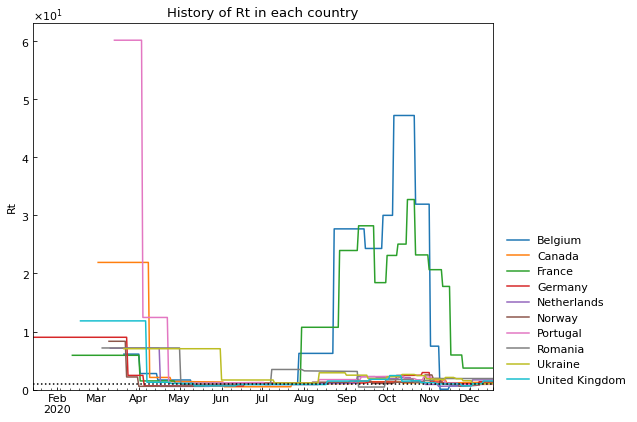

Country,Belgium,Canada,France,Germany,Netherlands,Norway,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-14,1.17,1.31,3.72,1.37,1.69,1.07,0.93,1.92,1.05,1.49
2020-12-15,1.17,1.31,3.72,1.37,1.69,1.07,0.93,1.92,1.05,1.49
2020-12-16,1.17,1.31,3.72,1.37,1.69,1.07,0.93,1.92,1.05,1.49
2020-12-17,1.17,1.31,3.72,1.37,1.69,1.07,0.93,1.92,1.05,1.49
2020-12-18,1.17,1.31,3.72,1.37,1.69,1.07,0.93,1.92,1.05,1.49


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

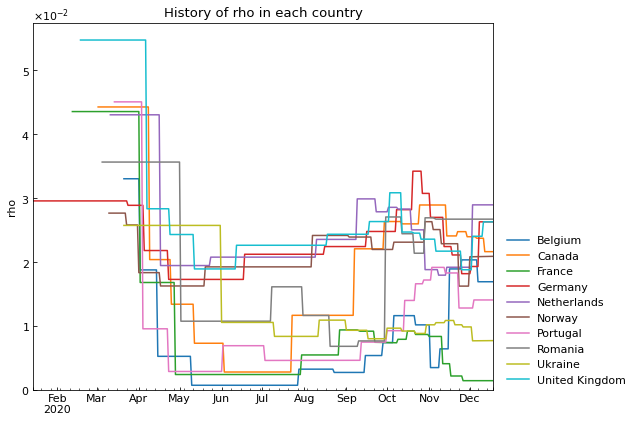

Country,Belgium,Canada,France,Germany,Netherlands,Norway,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-14,0.016897,0.021606,0.001412,0.026273,0.028931,0.020874,0.014046,0.026693,0.007682,0.026268
2020-12-15,0.016897,0.021606,0.001412,0.026273,0.028931,0.020874,0.014046,0.026693,0.007682,0.026268
2020-12-16,0.016897,0.021606,0.001412,0.026273,0.028931,0.020874,0.014046,0.026693,0.007682,0.026268
2020-12-17,0.016897,0.021606,0.001412,0.026273,0.028931,0.020874,0.014046,0.026693,0.007682,0.026268
2020-12-18,0.016897,0.021606,0.001412,0.026273,0.028931,0.020874,0.014046,0.026693,0.007682,0.026268


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

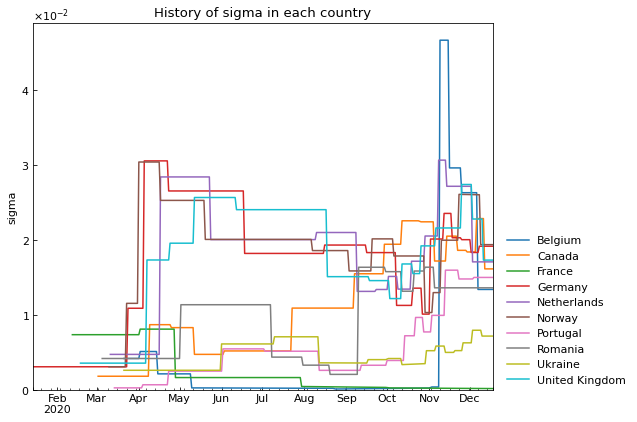

Country,Belgium,Canada,France,Germany,Netherlands,Norway,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-14,0.013373,0.016117,0.000152,0.019141,0.017052,0.01935,0.014976,0.013591,0.007153,0.017289
2020-12-15,0.013373,0.016117,0.000152,0.019141,0.017052,0.01935,0.014976,0.013591,0.007153,0.017289
2020-12-16,0.013373,0.016117,0.000152,0.019141,0.017052,0.01935,0.014976,0.013591,0.007153,0.017289
2020-12-17,0.013373,0.016117,0.000152,0.019141,0.017052,0.01935,0.014976,0.013591,0.007153,0.017289
2020-12-18,0.013373,0.016117,0.000152,0.019141,0.017052,0.01935,0.014976,0.013591,0.007153,0.017289


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

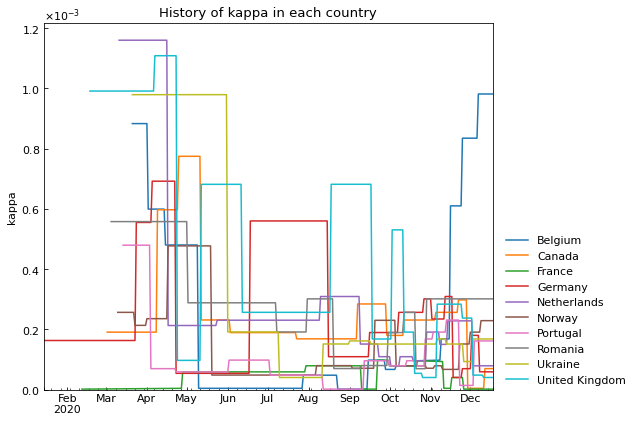

Country,Belgium,Canada,France,Germany,Netherlands,Norway,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-14,0.000981,0.00007,0.000002,0.000059,0.000079,0.000229,0.000162,0.000301,0.000168,0.00004
2020-12-15,0.000981,0.00007,0.000002,0.000059,0.000079,0.000229,0.000162,0.000301,0.000168,0.00004
2020-12-16,0.000981,0.00007,0.000002,0.000059,0.000079,0.000229,0.000162,0.000301,0.000168,0.00004
2020-12-17,0.000981,0.00007,0.000002,0.000059,0.000079,0.000229,0.000162,0.000301,0.000168,0.00004
2020-12-18,0.000981,0.00007,0.000002,0.000059,0.000079,0.000229,0.000162,0.000301,0.000168,0.00004


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

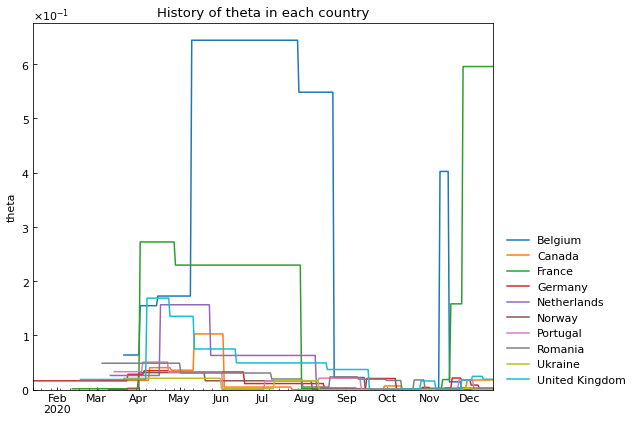

Country,Belgium,Canada,France,Germany,Netherlands,Norway,Portugal,Romania,Ukraine,United Kingdom
Date,,,,,,,,,,
2020-12-14,0.002188,0.018035,0.595738,0.002182,0.001598,0.00012,0.001122,0.003156,0.000132,0.01925
2020-12-15,0.002188,0.018035,0.595738,0.002182,0.001598,0.00012,0.001122,0.003156,0.000132,0.01925
2020-12-16,0.002188,0.018035,0.595738,0.002182,0.001598,0.00012,0.001122,0.003156,0.000132,0.01925
2020-12-17,0.002188,0.018035,0.595738,0.002182,0.001598,0.00012,0.001122,0.003156,0.000132,0.01925
2020-12-18,0.002188,0.018035,0.595738,0.002182,0.001598,0.00012,0.001122,0.003156,0.000132,0.01925


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32680 entries, 0 to 32805
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 32680 non-null  datetime64[ns]
 1   Country                              32680 non-null  object        
 2   Rt                                   32680 non-null  float64       
 3   theta                                32680 non-null  float64       
 4   kappa                                32680 non-null  float64       
 5   rho                                  32680 non-null  float64       
 6   sigma                                32680 non-null  float64       
 7   School_closing                       32680 non-null  int64         
 8   Workplace_closing                    32680 non-null  int64         
 9   Cancel_events                        32680 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.163861,-0.014167,0.124588,-0.516360,-0.157831,-0.214641,-0.210844,-0.155551,-0.004766,0.001412,0.036849,-0.074292,-0.117563,-0.089882,-0.016979,-0.195224
theta,-0.163861,1.000000,-0.169492,-0.401167,-0.247746,0.183322,0.211616,0.233395,0.164776,0.157939,0.371352,0.348770,0.064593,0.096401,-0.145216,0.034253,0.257660
kappa,-0.014167,-0.169492,1.000000,0.507948,0.154138,0.102196,0.087473,-0.018601,-0.120339,-0.113565,-0.073528,-0.090828,-0.338566,0.075652,-0.227524,-0.179381,-0.028274
rho,0.124588,-0.401167,0.507948,1.000000,0.215077,-0.242670,-0.304619,-0.197869,-0.486923,-0.255951,-0.370365,-0.364133,-0.541838,-0.294848,-0.414453,-0.263418,-0.392571
sigma,-0.516360,-0.247746,0.154138,0.215077,1.000000,0.119599,0.192257,0.261716,0.231987,-0.030924,-0.114180,-0.054981,-0.018191,0.166667,0.086053,0.095041,0.133401
School_closing,-0.157831,0.183322,0.102196,-0.242670,0.119599,1.000000,0.677489,0.126641,0.425517,0.161640,0.513854,0.223044,0.287986,0.384302,0.049015,-0.109277,0.744104
Workplace_closing,-0.214641,0.211616,0.087473,-0.304619,0.192257,0.677489,1.000000,0.480606,0.654841,0.311691,0.719433,0.383348,0.366740,0.509955,0.116959,-0.075698,0.850226
Cancel_events,-0.210844,0.233395,-0.018601,-0.197869,0.261716,0.126641,0.480606,1.000000,0.607866,0.503335,0.482693,0.661518,0.125697,0.416804,-0.009939,0.051310,0.557218
Gatherings_restrictions,-0.155551,0.164776,-0.120339,-0.486923,0.231987,0.425517,0.654841,0.607866,1.000000,0.407937,0.557696,0.626511,0.494369,0.614054,0.416005,0.266725,0.762597
Transport_closing,-0.004766,0.157939,-0.113565,-0.255951,-0.030924,0.161640,0.311691,0.503335,0.407937,1.000000,0.405372,0.652737,-0.045275,0.258482,-0.105779,-0.017798,0.417824


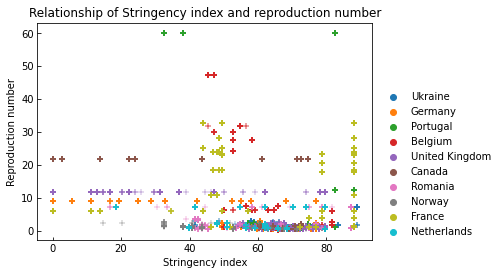

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()